In [1]:
import numpy as np
import networkx as nx
import scipy.linalg as la
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

https://github.com/statsmodels/statsmodels/issues/3039


In [2]:
def orthogonal_complement(x, normalize=True, threshold=1e-15):
    """Compute orthogonal complement of a matrix

    this works along axis zero, i.e. rank == column rank,
    or number of rows > column rank
    otherwise orthogonal complement is empty

    TODO possibly: use normalize='top' or 'bottom'

    """
    x = np.asarray(x)
    r, c = x.shape
    if r < c:
        import warnings
        warnings.warn('fewer rows than columns', UserWarning)

    # we assume svd is ordered by decreasing singular value, o.w. need sort
    s, v, d = np.linalg.svd(x)
    rank = (v > threshold).sum()

    oc = s[:, rank:]

    if normalize:
        k_oc = oc.shape[1]
        oc = oc.dot(np.linalg.inv(oc[:k_oc, :]))
    return oc



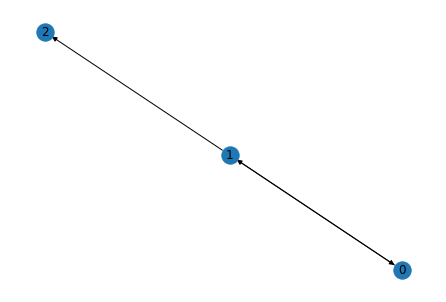

In [3]:
g_directed=nx.DiGraph()
g_directed.add_edge(0,1)
g_directed.add_edge(1,0)
g_directed.add_edge(1,2)

nx.draw(g_directed, with_labels = True)
plt.show()



In [4]:
A_directed = nx.adjacency_matrix(g_directed)
A_symmetric = 1/2*(A_directed + A_directed.T)


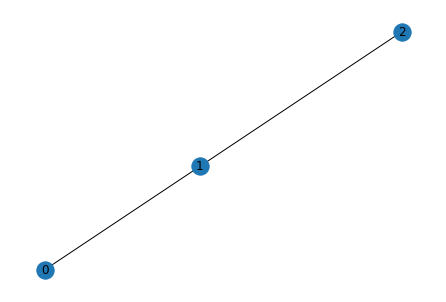

In [5]:

g_undirected = nx.from_numpy_array(A_symmetric)

nx.draw(g_undirected, with_labels = True)
plt.show()

In [6]:
L_directed = nx.directed_laplacian_matrix(g_directed)
L_undirected=nx.linalg.laplacian_matrix(g_undirected).todense()

print(la.eig(L_directed)[0][2])
print(la.eig(L_undirected)[0][2])
print(nx.linalg.algebraic_connectivity(g_undirected))

(0.9125963856228956+0j)
(0.6339745962155612+0j)
0.6339745962155617


Compute orthogonal complement in order to compute directed algebraic connectivity as defined in https://www-tandfonline-com.proxy-ub.rug.nl/doi/pdf/10.1080/03081080500054810?needAccess=true
The orthogonal complement of vector(s) is the set of all vectors orthogonal to given ones

In [7]:
xxx = np.array([[1,0,1,0,2], [0,1,1,1,0], [1,1,1,1,1]]).T
ocn = np.round(orthogonal_complement(xxx, normalize=True), 2)
print(ocn)
print(orthogonal_complement(xxx, normalize=False))
print(ocn.T.dot(xxx))

[[ 1. -0.]
 [ 0.  1.]
 [ 1.  0.]
 [-1. -1.]
 [-1. -0.]]
[[-0.06635725 -0.5303876 ]
 [-0.66845821  0.35297619]
 [-0.06635725 -0.5303876 ]
 [ 0.73481546  0.17741141]
 [ 0.06635725  0.5303876 ]]
[[0. 0. 0.]
 [0. 0. 0.]]
